In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,...,x5_zinc undecylenate,x6_None,x6_copper bromide,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 63
0,0,0,0,0,0.713177,0.328895,-0.453863,-0.453709,-0.297521,-0.749374,...,0,1,0,0,0,0,6.7000,622,680.000000,58.000000
1,1,1,1,1,-0.336633,-0.477469,-0.453863,-0.453709,-0.076698,-0.749374,...,0,1,0,0,0,0,1.5000,445,568.000000,123.000000
2,2,2,2,2,0.713177,0.328895,-0.453863,-0.453709,-0.076698,-0.749374,...,0,1,0,0,0,0,2.5000,543,589.000000,46.000000
3,3,5,5,5,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,...,0,1,0,0,0,0,3.6750,431,590.944444,159.944444
4,4,6,6,6,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,...,0,1,0,0,0,0,3.7500,432,590.944444,158.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,152,152,152,-0.730311,-0.779855,-0.453863,-0.085147,-0.394734,-0.678852,...,0,1,0,0,0,0,2.8015,500,550.000000,50.000000
143,143,153,153,153,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,8.3000,532,590.000000,58.000000
144,144,154,154,154,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,3.0745,549,590.944444,41.944444
145,145,155,155,155,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,3.1795,562,590.944444,28.944444


In [3]:
# Input for ML models


input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'ligand_amount_mmol',
             'first_sol_amount_ml',
             'second_sol_amount_ml',
             'other_1_amount_mmol',
             'other_2_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_lauric acid',
             'x2_myristic acid',
             'x2_oleic acid',
             'x2_palmitic acid',
             'x2_stearic acid',
             'x3_dodecylamine',
             'x3_octadecene',
             'x3_oleylamine',
             'x3_trioctylamine',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_dioctyl ether',
             'x4_dioctylamine',
             'x4_hexadecylamine',
             'x4_octylamine',
             'x4_oleylamine',
             'x4_toluene',
             'x4_trioctylphosphine',
             'x4_trioctylphosphine oxide',
             'x5_None',
             'x5_acetic acid',
             'x5_superhydride',
             'x5_tetrabutylammonium myristate',
             'x5_zinc bromide'
             ,'x5_zinc chloride'
             ,'x5_zinc iodide'
             ,'x5_zinc oleate',
             'x5_zinc stearate',
             'x5_zinc undecylenate',
             'x6_None',
             'x6_copper bromide',
             'x6_trioctylphosphine',
             'x6_water',
             'x6_zinc iodide'
            ]
#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:18<00:00, 18.27s/it]

0.24854545454545443 2 12 25


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:05<00:00,  4.31s/it]

0.2259389082166081 13 12 12


### 3D. Random Forest

In [6]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [19:56<00:00, 39.88s/it]

0.2417207994937688 10 8 36


### 4D. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:16<00:00,  2.39it/s]

0.34791567852437416 3 2


### Saving Decision Tree model

In [4]:
DT_regr_d = DecisionTreeRegressor(max_depth=13,
                                max_features=12,
                                random_state=12)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr_d.predict(X_test_d))
joblib.dump(DT_regr_d, "./model_SO_diameter_DecisionTree.joblib")

['./model_SO_diameter_DecisionTree.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [8]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:28<00:00, 21.18s/it]

6.391304347826087 1 20 11


### 2E. Decision Trees

In [9]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:25<00:00,  5.03s/it]

8.393719808695653 18 10 58


### 3E. Random Forest

In [10]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [17:40<00:00, 35.34s/it]

11.891304353623196 14 1 5


### 4E. K Neighbors

In [11]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:16<00:00,  2.39it/s]

9.741545895652177 1 6


### Saving Extra Trees model

In [5]:
ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=20,     
                            random_state=11).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [12]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [14:37<00:00, 30.27s/it]

17.608695652173914 1 21 46


### 2A. Decision Trees


In [13]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:22<00:00,  4.90s/it]

20.956521739130434 19 5 42


In [22]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7157594152974505 ; MSE: 1033.208754199327 ; RMSE: 32.14356474007398 ; MAE: 20.595959593939398


### 3A. Random Forest

In [14]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 26)):
    for j in range(1, 26):
        for k in range(2, 40, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 25/25 [08:59<00:00, 21.59s/it]

25.304347826086957 18 1 22


### 4A. K Neighbors

In [15]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:16<00:00,  2.43it/s]

21.695652173913043 1 2


### Saving model

In [6]:
ET_regr_a = ExtraTreesRegressor(n_estimators=1, 
                                max_features=21,
                                random_state=46)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [7]:
## Diameter

DT_regr_d = DecisionTreeRegressor(max_depth=13,
                                max_features=12,
                                random_state=12)
DT_regr_d.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = DT_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
D_r_2 = r2_score(Y_test_d, DT_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, DT_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, DT_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=20,     
                            random_state=11).fit(X_train_e, np.ravel(Y_train_e))

                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=1, 
                                max_features=21,
                                random_state=46)
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.792062               0.225939              0.203452                   0.451057
Absorption  0.827261              17.6087              584.217                     24.1706
Emission    0.859786               6.3913              201.435                     14.1928


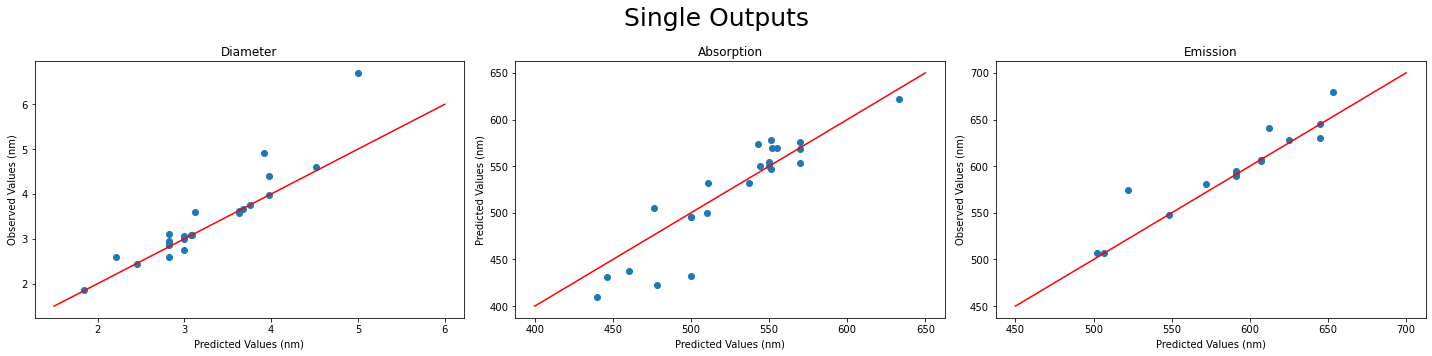

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(DT_Y_pred_d, Y_test_d, 'o')
ax1.plot([1.5,6],[1.5,6], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')

ax2.plot(ET_Y_pred_a, Y_test_a, 'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Predicted Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(ET_Y_pred_e, Y_test_e, 'o')
ax3.plot([450,700],[450,700], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [11]:
importance_dict_d = dict()
for i in range(0,57):
    importance_dict_d[input_col[i]] = DT_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('time_min', 0.296901575271133),
 ('temp_c', 0.20054020061439295),
 ('x2_myristic acid', 0.12563236053458512),
 ('total_volume_ml', 0.07531671387859877),
 ('x2_stearic acid', 0.04803669012541793),
 ('x5_zinc iodide', 0.04107413086775085),
 ('x0_indium chloride', 0.03841583749769048),
 ('x1_tris(dimethylamino)phosphine', 0.03215342936204424),
 ('x3_trioctylamine', 0.020790342666004297),
 ('ligand_amount_mmol', 0.01900901554662102),
 ('x5_zinc bromide', 0.01855934280316017),
 ('p_amount_mmol', 0.017595269696790525),
 ('in_amount_mmol', 0.016128762789457036),
 ('x5_zinc oleate', 0.014738798922348775),
 ('other_2_amount_mmol', 0.014291705740191866),
 ('x4_oleylamine', 0.012433375763710891),
 ('x6_None', 0.002600181872361178),
 ('x4_None', 0.0013278752309520052),
 ('x1_tris(trimethylgermyl)phosphine', 0.0012306176251147063),
 ('x0_indium acetate', 0.0010543857828360806),
 ('other_1_amount_mmol', 0.0008935051702307117),
 ('second_sol_amount_ml', 0.0005880769882614974),
 ('x5_None', 0.000440

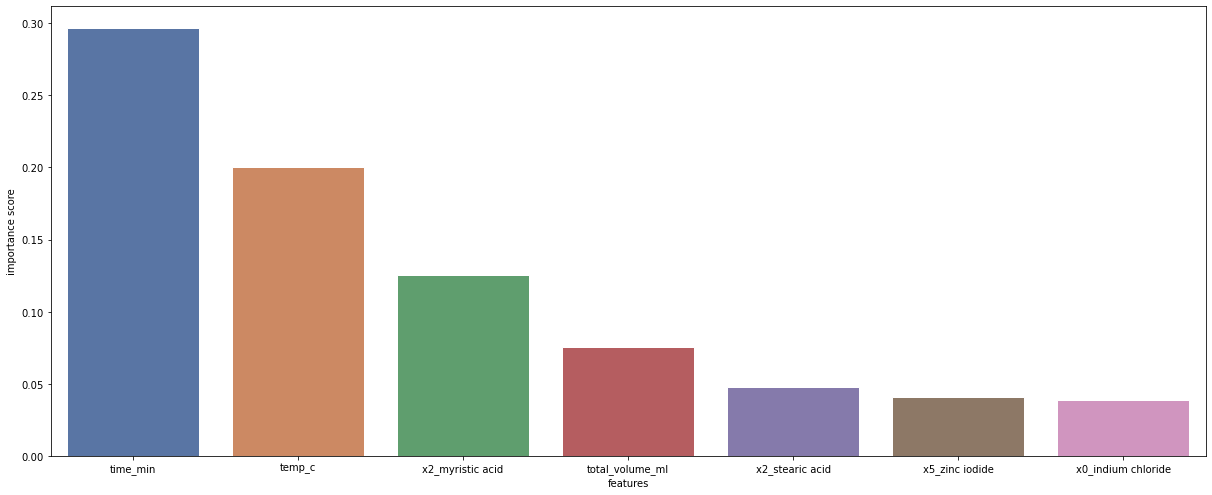

In [12]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [14]:
importance_dict_e = dict()
for i in range(0,57):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x5_zinc oleate', 0.19095778989389103),
 ('x4_oleylamine', 0.10433220864207085),
 ('temp_c', 0.09746311713045118),
 ('x2_myristic acid', 0.08650807762879952),
 ('x5_zinc iodide', 0.07711005668396828),
 ('x2_None', 0.05888186148209227),
 ('time_min', 0.05135714542747361),
 ('x5_zinc chloride', 0.040900063262798374),
 ('x2_stearic acid', 0.039700738598688966),
 ('x5_zinc bromide', 0.03925076733134555),
 ('first_sol_amount_ml', 0.03485665018782931),
 ('x5_superhydride', 0.02910665141622256),
 ('in_amount_mmol', 0.027279418665212926),
 ('x6_trioctylphosphine', 0.020665136063960265),
 ('x0_indium chloride', 0.013709310336861607),
 ('x0_indium iodide', 0.013531200187969801),
 ('x6_None', 0.01316205021703738),
 ('other_1_amount_mmol', 0.013124219680691907),
 ('x1_tris(dimethylamino)phosphine', 0.012160707713205644),
 ('other_2_amount_mmol', 0.009175755812837676),
 ('ligand_amount_mmol', 0.008718459920865331),
 ('p_amount_mmol', 0.0052871850323452626),
 ('x4_octylamine', 0.003450851703087260

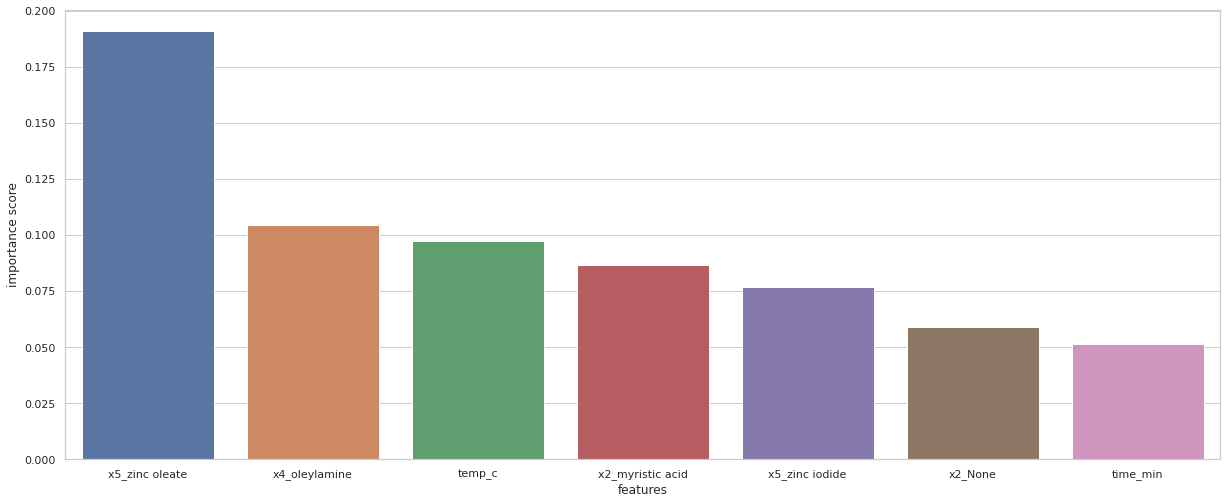

In [15]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [17]:
importance_dict_a = dict()
for i in range(0,57):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('temp_c', 0.15930045007504934),
 ('time_min', 0.14077959100040388),
 ('x5_zinc iodide', 0.11334348271275517),
 ('x6_None', 0.0639511876815259),
 ('x5_zinc bromide', 0.058813037491885434),
 ('x3_trioctylphosphine', 0.04884411605908868),
 ('p_amount_mmol', 0.045569451098463075),
 ('x4_None', 0.04405653028219348),
 ('x2_stearic acid', 0.03777156284488139),
 ('ligand_amount_mmol', 0.035889309885710374),
 ('x5_None', 0.030949129002546618),
 ('x2_oleic acid', 0.029679652401006132),
 ('x5_zinc oleate', 0.02855758296451797),
 ('x0_indium iodide', 0.025832725534215093),
 ('in_amount_mmol', 0.018172031881505776),
 ('x4_oleylamine', 0.01594613972005549),
 ('x4_trioctylphosphine', 0.015678009927441686),
 ('x4_toluene', 0.013565585362537592),
 ('x2_lauric acid', 0.01343610967501738),
 ('total_volume_ml', 0.013313948938806337),
 ('other_1_amount_mmol', 0.011026488736176922),
 ('x1_tris(trimethylsilyl)phosphine', 0.010473698981506064),
 ('x3_oleylamine', 0.007514506231196505),
 ('first_sol_amount_m

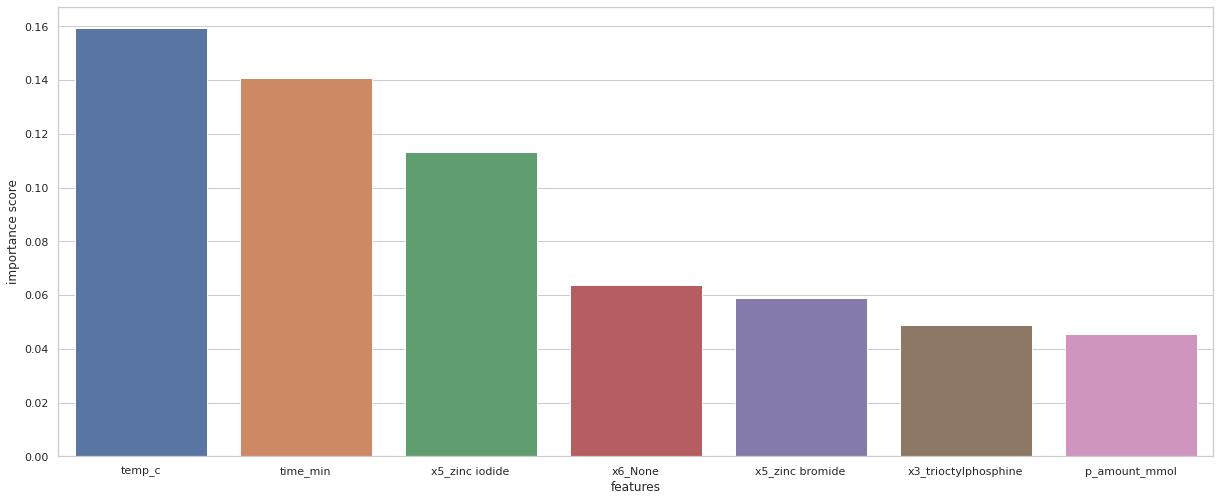

In [18]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [19]:
importance_dict_a

{'in_amount_mmol': 0.018172031881505776,
 'p_amount_mmol': 0.045569451098463075,
 'ligand_amount_mmol': 0.035889309885710374,
 'first_sol_amount_ml': 0.005240834788083598,
 'second_sol_amount_ml': 0.002688794418082299,
 'other_1_amount_mmol': 0.011026488736176922,
 'other_2_amount_mmol': 0.0,
 'total_volume_ml': 0.013313948938806337,
 'temp_c': 0.15930045007504934,
 'time_min': 0.14077959100040388,
 'x0_indium acetate': 0.0024205882090588358,
 'x0_indium bromide': 0.0,
 'x0_indium chloride': 0.0004605885614542637,
 'x0_indium iodide': 0.025832725534215093,
 'x0_indium myristate': 4.542293505294607e-06,
 'x0_indium trifluoroacetate': 0.0,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphorus trichloride': 0.0,
 'x1_tris(diethylamino)phosphine': 0.0,
 'x1_tris(dimethylamino)phosphine': 0.004112195089162054,
 'x1_tris(trimethylgermyl)phosphine': 0.0,
 'x1_tris(trimethylsilyl)phosphine': 0.010473698981506064,
 'x2_None': 0.0,
 'x2_lauric acid': 0.01343610967501738,
 'x2_myristic acid': 

### Combine


In [20]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [21]:
sorted_d 

[('first_sol_amount_ml', 0.0),
 ('in_amount_mmol', 0.016128762789457036),
 ('ligand_amount_mmol', 0.01900901554662102),
 ('other_1_amount_mmol', 0.0008935051702307117),
 ('other_2_amount_mmol', 0.014291705740191866),
 ('p_amount_mmol', 0.017595269696790525),
 ('second_sol_amount_ml', 0.0005880769882614974),
 ('temp_c', 0.20054020061439295),
 ('time_min', 0.296901575271133),
 ('total_volume_ml', 0.07531671387859877),
 ('x0_indium acetate', 0.0010543857828360806),
 ('x0_indium bromide', 0.0),
 ('x0_indium chloride', 0.03841583749769048),
 ('x0_indium iodide', 0.0),
 ('x0_indium myristate', 0.0),
 ('x0_indium trifluoroacetate', 0.0),
 ('x1_bis(trimethylsilyl)phosphine', 0.0),
 ('x1_phosphorus trichloride', 0.0),
 ('x1_tris(diethylamino)phosphine', 0.0),
 ('x1_tris(dimethylamino)phosphine', 0.03215342936204424),
 ('x1_tris(trimethylgermyl)phosphine', 0.0012306176251147063),
 ('x1_tris(trimethylsilyl)phosphine', 1.3852054691834527e-05),
 ('x2_None', 0.0),
 ('x2_lauric acid', 0.0),
 ('x2_myr

In [22]:
combined_importance = dict()

In [25]:
for i in range(0,57):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'first_sol_amount_ml': 0.04009748497591291,
 'in_amount_mmol': 0.061580213336175735,
 'ligand_amount_mmol': 0.06361678535319673,
 'other_1_amount_mmol': 0.025044213587099542,
 'other_2_amount_mmol': 0.02346746155302954,
 'p_amount_mmol': 0.06845190582759886,
 'second_sol_amount_ml': 0.003283801942061781,
 'temp_c': 0.45730376781989346,
 'time_min': 0.48903831169901046,
 'total_volume_ml': 0.0902675770408849,
 'x0_indium acetate': 0.0034752435127407555,
 'x0_indium bromide': 0.0,
 'x0_indium chloride': 0.05258573639600635,
 'x0_indium iodide': 0.039363925722184896,
 'x0_indium myristate': 4.542293505294607e-06,
 'x0_indium trifluoroacetate': 8.686153263872757e-07,
 'x1_bis(trimethylsilyl)phosphine': 0.0,
 'x1_phosphorus trichloride': 0.0,
 'x1_tris(diethylamino)phosphine': 0.0009371781077302261,
 'x1_tris(dimethylamino)phosphine': 0.04842633216441194,
 'x1_tris(trimethylgermyl)phosphine': 0.0026130397633976087,
 'x1_tris(trimethylsilyl)phosphine': 0.010487551036197898,
 'x2_None': 0.05

In [26]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('time_min', 0.48903831169901046),
 ('temp_c', 0.45730376781989346),
 ('x5_zinc oleate', 0.23425417178075778),
 ('x5_zinc iodide', 0.2315276702644743),
 ('x2_myristic acid', 0.21233859571756059),
 ('x4_oleylamine', 0.13271172412583723),
 ('x2_stearic acid', 0.1255089915689883),
 ('x5_zinc bromide', 0.11662314762639116),
 ('total_volume_ml', 0.0902675770408849),
 ('x6_None', 0.07971341977092446),
 ('p_amount_mmol', 0.06845190582759886),
 ('ligand_amount_mmol', 0.06361678535319673),
 ('in_amount_mmol', 0.061580213336175735),
 ('x2_None', 0.05888186148209227),
 ('x0_indium chloride', 0.05258573639600635),
 ('x3_trioctylphosphine', 0.04884411605908868),
 ('x1_tris(dimethylamino)phosphine', 0.04842633216441194),
 ('x4_None', 0.04575027803989695),
 ('x5_zinc chloride', 0.04286914749741522),
 ('first_sol_amount_ml', 0.04009748497591291),
 ('x0_indium iodide', 0.039363925722184896),
 ('x5_None', 0.03320745735543789),
 ('x2_oleic acid', 0.029679652401006132),
 ('x5_superhydride', 0.02910665141

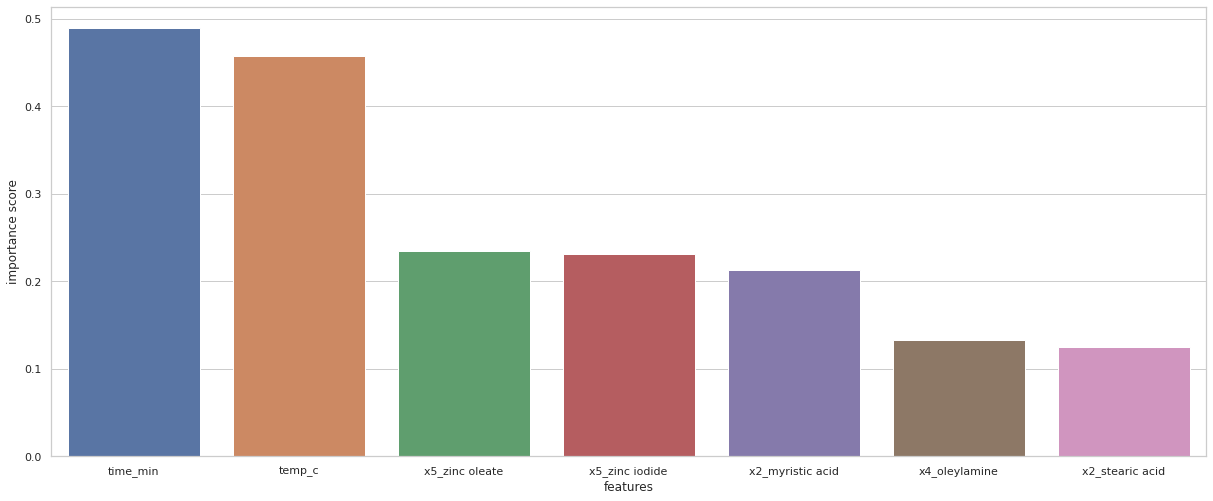

In [27]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)